In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import ttest_ind, linregress

In [ ]:
import mysql.connector

# Connect to MySQL
try:
    connection = mysql.connector.connect(
        host='127.0.0.1',      
        user='root',         # MySQL username
        password='Mogad1shu*#',  # MySQL password
        database='comp3421'   # database name
    )

    if connection.is_connected():
        print("Successfully connected to MySQL database")

except mysql.connector.Error as err:
    print(f"Error: {err}")

# finally:
    # if connection.is_connected():
        # connection.close()
        # print("MySQL connection is closed")

Successfully connected to MySQL database


In [ ]:
#1. Define the query
query = """
SELECT
    m.player_id,
    m.name_first,
    m.name_last,
    m.birth_year,
    m.birth_month,
    m.birth_day
FROM
    mlb_master m
LEFT JOIN
    mlb_manager man ON m.player_id = man.player_id
WHERE
    man.player_id IS NULL;
"""
#Execute the query and fetch results
cursor = connection.cursor()
cursor.execute(query)
results = cursor.fetchall()


#Load data into a Pandas DataFrame
columns = [desc[0] for desc in cursor.description]  # Get column names
data1 = pd.DataFrame(results, columns=columns)

#Display the DataFrame 
print("\nData as DataFrame:")
print(data1)


Data as DataFrame:
      player_id name_first   name_last  birth_year  birth_month  birth_day
0      abadfe01   Fernando        Abad        1985           12         17
1     abreubo01      Bobby       Abreu        1974            3         11
2     abreujo02       Jose       Abreu        1987            1         29
3     abreuto01       Tony       Abreu        1984           11         13
4     aceveal01    Alfredo      Aceves        1982           12          8
...         ...        ...         ...         ...          ...        ...
1315  zieglbr01       Brad     Ziegler        1979           10         10
1316  zimmejo02     Jordan  Zimmermann        1986            5         23
1317  zimmery01       Ryan   Zimmerman        1984            9         28
1318  zobribe01        Ben     Zobrist        1981            5         26
1319  zuninmi01       Mike      Zunino        1991            3         25

[1320 rows x 6 columns]


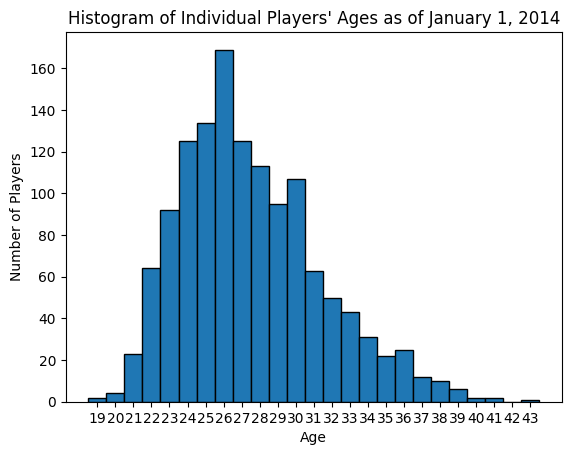

In [39]:

# Rename columns to match the expected names for to_datetime
data1.rename(columns={'birth_year': 'year',
            'birth_month': 'month', 'birth_day': 'day'}, inplace=True)

# Calculate birth_date using the corrected column names
data1['birth_date'] = pd.to_datetime(data1[['year', 'month', 'day']])

# Calculate age as of January 1, 2014
reference_date = datetime(2014, 1, 1)
data1['age'] = data1['birth_date'].apply(
    lambda x: (reference_date - x).days // 365)

# Plot a histogram of individual ages with each bar representing a specific age
plt.hist(data1['age'], bins=range(data1['age'].min(),
         data1['age'].max() + 2), edgecolor='black', align='left')
plt.title('Histogram of Individual Players\' Ages as of January 1, 2014')
plt.xlabel('Age')
plt.ylabel('Number of Players')
# Show individual ages on the x-axis
plt.xticks(range(data1['age'].min(), data1['age'].max() + 1))
plt.show()

In [ ]:

#2.  Define the query
query = """
SELECT
    m.height,
    m.weight
FROM
    mlb_master m
LEFT JOIN
    mlb_manager man ON m.player_id = man.player_id
WHERE
    man.player_id IS NULL
    AND m.height IS NOT NULL
    AND m.weight IS NOT NULL;
"""

# Execute the query and fetch results
cursor = connection.cursor()
cursor.execute(query)
results = cursor.fetchall()

#Load the data into a Pandas DataFrame
columns = [desc[0] for desc in cursor.description]
data2 = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print("\nData as DataFrame:")
print(data2)




Data as DataFrame:
      height  weight
0       73.0     220
1       72.0     220
2       75.0     255
3       70.0     200
4       74.0     205
...      ...     ...
1315    76.0     210
1316    74.0     220
1317    75.0     220
1318    75.0     210
1319    74.0     220

[1320 rows x 2 columns]


Slope: 4.94547130486684
Intercept: -154.8862483333576
Regression equation: Weight = 4.95 * Height + -154.89


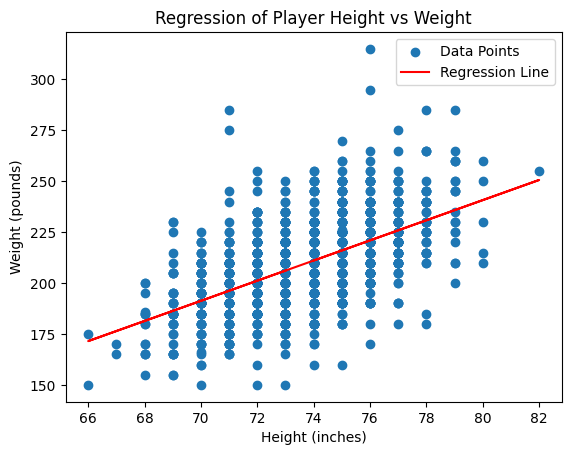

In [ ]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    data2['height'], data2['weight'])

#  Display results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Regression equation: Weight = {slope:.2f} * Height + {intercept:.2f}")

# Visualize the regression
plt.scatter(data2['height'], data2['weight'], label='Data Points')
plt.plot(data2['height'], slope * data2['height'] +
         intercept, color='red', label='Regression Line')
plt.title('Regression of Player Height vs Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.show()

In [ ]:

#3. Batting averages
query = """
SELECT
    m.player_id,
    m.birth_year,
    m.birth_month,
    m.birth_day,
    COALESCE(SUM(b.hits), 0) AS total_hits,
    COALESCE(SUM(b.at_bats), 0) AS total_at_bats
FROM
    mlb_master m
LEFT JOIN
    mlb_manager man ON m.player_id = man.player_id
LEFT JOIN
    mlb_batting b ON m.player_id = b.player_id
WHERE
    man.player_id IS NULL
GROUP BY
    m.player_id, m.birth_year, m.birth_month, m.birth_day;
"""

# Execute the query and fetch results
cursor = connection.cursor()
cursor.execute(query)
results = cursor.fetchall()

# Load the data into a Pandas DataFrame
columns = [desc[0] for desc in cursor.description]
data3 = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print("\nData as DataFrame:")
print(data3)


Data as DataFrame:
      player_id  birth_year  birth_month  birth_day total_hits total_at_bats
0      abadfe01        1985           12         17          0             0
1     abreubo01        1974            3         11         33           133
2     abreujo02        1987            1         29        176           556
3     abreuto01        1984           11         13          0             4
4     aceveal01        1982           12          8          0             0
...         ...         ...          ...        ...        ...           ...
1315  zieglbr01        1979           10         10          0             1
1316  zimmejo02        1986            5         23         10            55
1317  zimmery01        1984            9         28         60           214
1318  zobribe01        1981            5         26        155           570
1319  zuninmi01        1991            3         25         87           438

[1320 rows x 6 columns]


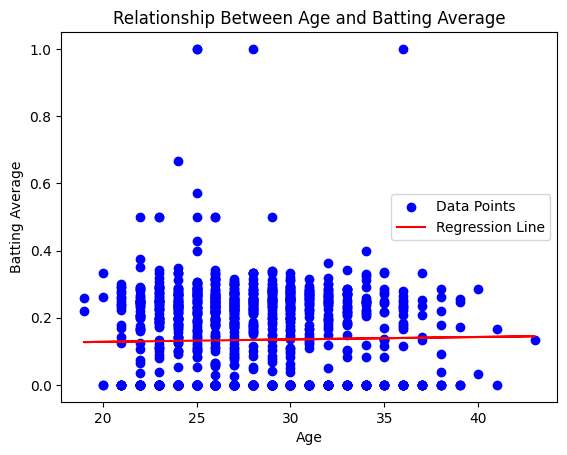

Slope: 0.0007257535987658967
Intercept: 0.11365564470507253


In [135]:

# Rename columns to match the expected names for to_datetime
data3.rename(columns={'birth_year': 'year',
            'birth_month': 'month', 'birth_day': 'day'}, inplace=True)

# Calculate birth_date using the corrected column names
data3['birth_date'] = pd.to_datetime(data3[['year', 'month', 'day']])

# Calculate age as of January 1, 2014
reference_date = datetime(2014, 1, 1)
data3['age'] = data3['birth_date'].apply(
    lambda x: (reference_date - x).days // 365)


# Calculate batting average
data3['batting_average'] = data3['total_hits'] / \
    data3['total_at_bats'].replace(0, 1)  # Avoid division by zero

# Ensure batting_average is numeric
data3['batting_average'] = pd.to_numeric(
    data3['batting_average'], errors='coerce')
# Drop rows with NaN values in batting_average
data3 = data3.dropna(subset=['batting_average'])

# Perform regression
slope, intercept, r_value, p_value, std_err = linregress(
    data3['age'], data3['batting_average']
)

# Plot the regression
plt.scatter(data3['age'], data3['batting_average'],
            label='Data Points', color='blue')
plt.plot(data3['age'], slope * data3['age'] + intercept,
         color='red', label='Regression Line')

plt.title('Relationship Between Age and Batting Average')
plt.xlabel('Age')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

# Output the regression details
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")



In [ ]:
# option 1: This code concludes that the "best age" is the age at which the highest batting average was recorded
best_age = data3.loc[data3['batting_average'].idxmax(), 'age']
print(f"The best age for a player based on batting average is: {best_age}")

#option 2: Since we have small sample sizes for certain ages, we can filter the data to include only age groups with more players to ensure the "best age" is determined based on sufficient data.
# Group by Age and Count Players
age_counts = data3.groupby('age').size()
# Filter ages with at least 25 players
valid_ages = age_counts[age_counts >= 25].index

# Filter the Original Data
filtered_data = data3[data3['age'].isin(valid_ages)]

# Calculate Average Batting Average by Age
avg_batting_by_age = filtered_data.groupby('age')['batting_average'].mean()

#Determine the Best Age
best_age = avg_batting_by_age.idxmax()
print(f"The best age based on average batting average for age groups with at least 25 players is: {
      best_age}") 
# The best age for a player based on batting average is subject to change in the given dataset if the filter for the least number of players is changed.

The best age for a player based on batting average is: 36
The best age based on average batting average for age groups with at least 25 players is: 32


Players tend to maintain or slightly improve their batting average as they age as the linear relationships is extremely weak and not statistically significant.

In [ ]:
# 4.  Query data
query = """
WITH batting_aggregated AS (
    SELECT
        player_id,
        SUM(homeruns) AS total_homeruns,
        SUM(at_bats) AS total_at_bats
    FROM
        mlb_batting
    GROUP BY
        player_id
)
SELECT
    m.player_id,
    m.weight,
    COALESCE(b.total_homeruns, 0) AS total_homeruns,
    COALESCE(b.total_at_bats, 0) AS total_at_bats
FROM
    mlb_master m
LEFT JOIN
    batting_aggregated b ON m.player_id = b.player_id
WHERE
    m.player_id NOT IN (SELECT DISTINCT player_id FROM mlb_manager);


"""
cursor = connection.cursor()
cursor.execute(query)
results = cursor.fetchall()

# Load data into a DataFrame
columns = [desc[0] for desc in cursor.description]
data4 = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print("\nData as DataFrame:")
print(data4)


Data as DataFrame:
      player_id  weight total_homeruns total_at_bats
0      abadfe01     220              0             0
1     abreubo01     220              1           133
2     abreujo02     255             36           556
3     abreuto01     200              0             4
4     aceveal01     205              0             0
...         ...     ...            ...           ...
1315  zieglbr01     210              0             1
1316  zimmejo02     220              0            55
1317  zimmery01     220              5           214
1318  zobribe01     210             10           570
1319  zuninmi01     220             22           438

[1320 rows x 4 columns]


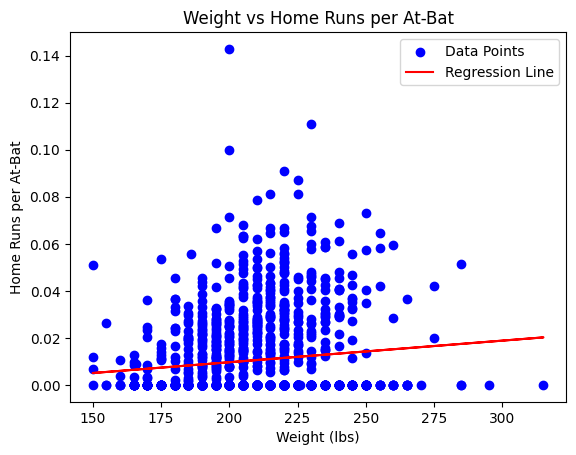

Average Weight: 209.42 lbs

HR/AB by Weight Class:
               total_homeruns  total_at_bats  hr_per_at_bat
weight_class                                               
Above Average          2643.0        83930.0       0.031491
Below Average          1543.0        81684.0       0.018890

T-statistic: 3.3063, P-value: 0.0010

Conclusion:
The difference in HR/AB between heavier and lighter players is statistically significant.


In [ ]:

# Ensure numeric data types
data4['total_homeruns'] = pd.to_numeric(
    data4['total_homeruns'], errors='coerce')
data4['total_at_bats'] = pd.to_numeric(data4['total_at_bats'], errors='coerce')

# Replace zero or missing at-bats with NaN
data4['total_at_bats'] = data4['total_at_bats'].replace(0, np.nan)

# Calculate HR/AB, setting it to 0 where at-bats are missing or zero
data4['hr_per_at_bat'] = data4['total_homeruns'] / data4['total_at_bats']
data4['hr_per_at_bat'] = data4['hr_per_at_bat'].fillna(0)  # Replace NaN with 0

#  Calculate average weight
average_weight = data4['weight'].astype(float).mean()

#  Classify players by weight
data4['weight_class'] = np.where(data4['weight'].astype(
    float) > average_weight, 'Above Average', 'Below Average')

#  Calculate HR/AB for Above and Below Average Weight Groups
grouped = data4.groupby('weight_class').agg(
    total_homeruns=('total_homeruns', 'sum'),
    total_at_bats=('total_at_bats', 'sum')
)
grouped['hr_per_at_bat'] = grouped['total_homeruns'] / grouped['total_at_bats']

#  Perform T-Test to Check Statistical Significance
above_avg = data4.loc[data4['weight_class'] ==
                      'Above Average', 'hr_per_at_bat'].astype(float)
below_avg = data4.loc[data4['weight_class'] ==
                      'Below Average', 'hr_per_at_bat'].astype(float)
t_stat, p_value = ttest_ind(above_avg, below_avg, nan_policy='omit')

#  Plot the Relationship Between Weight and HR/AB
data4['weight'] = data4['weight'].astype(float)
plt.scatter(data4['weight'], data4['hr_per_at_bat'],
            label='Data Points', color='blue')
slope, intercept, r_value, p_value_reg, std_err = linregress(
    data4['weight'], data4['hr_per_at_bat'])
plt.plot(data4['weight'], slope * data4['weight'] +
         intercept, color='red', label='Regression Line')
plt.title('Weight vs Home Runs per At-Bat')
plt.xlabel('Weight (lbs)')
plt.ylabel('Home Runs per At-Bat')
plt.legend()
plt.show()

# Output Results
print(f"Average Weight: {average_weight:.2f} lbs")
print("\nHR/AB by Weight Class:")
print(grouped)
print(f"\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print("\nConclusion:")
if p_value < 0.05:
    print("The difference in HR/AB between heavier and lighter players is statistically significant.")
else:
    print("The difference in HR/AB between heavier and lighter players is not statistically significant.")

Heavier players hit more home runs per at-bat than lighter players.
With a p-value of less than 0.05, the difference in HR/AB between heavier and lighter players is statistically significant.

In [ ]:


# 5. Execute the SQL Query
query = """
WITH player_ages AS (
    SELECT
        t.team_id,
        m.player_id,
        YEAR(CURDATE()) - m.birth_year AS age
    FROM
        mlb_team t
    JOIN
        mlb_batting b ON t.team_id = b.team_id
    JOIN
        mlb_master m ON b.player_id = m.player_id
    LEFT JOIN
        mlb_manager man ON m.player_id = man.player_id
    WHERE
        man.player_id IS NULL -- Exclude managers
),
team_average_ages AS (
    SELECT
        team_id,
        AVG(age) AS average_age
    FROM
        player_ages
    GROUP BY
        team_id
)
SELECT
    t.team_id,
    t.wins,
    t.games,
    t.wins / t.games AS winning_percentage,
    ta.average_age
FROM
    mlb_team t
JOIN
    team_average_ages ta ON t.team_id = ta.team_id
ORDER BY
    ta.average_age DESC;

"""

cursor = connection.cursor()
cursor.execute(query)
results = cursor.fetchall()

# Load data into a DataFrame
columns = [desc[0] for desc in cursor.description]
data5 = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print("\nData as DataFrame:")
print(data5)


Data as DataFrame:
   team_id  wins  games winning_percentage average_age
0      NYA    84    162             0.5185     40.0000
1      PHI    73    162             0.4506     39.7551
2      OAK    88    162             0.5432     39.6304
3      SFN    88    162             0.5432     39.5870
4      LAN    94    162             0.5802     39.2245
5      LAA    98    162             0.6049     39.1455
6      BOS    71    162             0.4383     39.0727
7      NYN    79    162             0.4877     39.0000
8      TOR    83    162             0.5123     38.9818
9      MIL    82    162             0.5062     38.9750
10     TBA    77    162             0.4753     38.8837
11     WAS    96    162             0.5926     38.8500
12     CLE    85    162             0.5247     38.8261
13     SDN    77    162             0.4753     38.8039
14     KCA    89    162             0.5494     38.7917
15     MIN    70    162             0.4321     38.6875
16     CIN    76    162             0.4691   

The team with the oldest average age is NYA with an average age of 40.00 years.


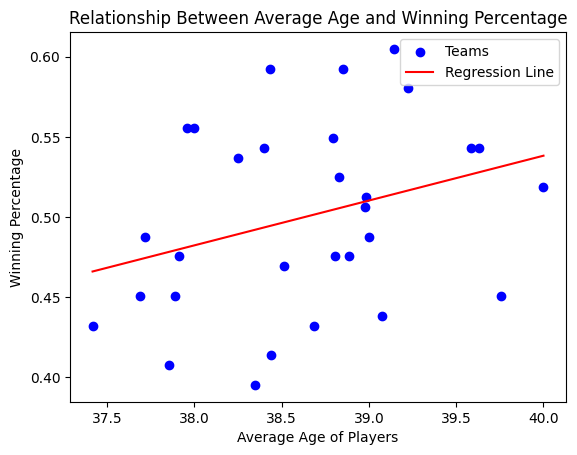


Regression Analysis:
Slope: 0.02798881146408714
Intercept: -0.5813258063460266
R-squared: 0.0965
P-value: 0.0948
There is no statistically significant relationship between average age and winning percentage.


In [154]:
# Convert columns to numeric
data5['average_age'] = pd.to_numeric(data5['average_age'], errors='coerce')
data5['winning_percentage'] = pd.to_numeric(
    data5['winning_percentage'], errors='coerce')

# Display the Team with the Oldest Average Age
oldest_team = data5.iloc[0]
print(f"The team with the oldest average age is {
      oldest_team['team_id']} with an average age of {oldest_team['average_age']:.2f} years.")

# Analyze Relationship Between Average Age and Winning Percentage
slope, intercept, r_value, p_value, std_err = linregress(
    data5['average_age'], data5['winning_percentage'])

#  Plot the Relationship
plt.scatter(data5['average_age'], data5['winning_percentage'],
            label='Teams', color='blue')
plt.plot(data5['average_age'], slope * data5['average_age'] +
         intercept, color='red', label='Regression Line')
plt.title('Relationship Between Average Age and Winning Percentage')
plt.xlabel('Average Age of Players')
plt.ylabel('Winning Percentage')
plt.legend()
plt.show()


# Output Results
print("\nRegression Analysis:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant relationship between average age and winning percentage.")
else:
    print("There is no statistically significant relationship between average age and winning percentage.")

In [ ]:

#6.  Execute the SQL Query
query = """
WITH player_stealing_stats AS (
    SELECT
        b.team_id,
        b.player_id,
        SUM(b.caught_stealing) AS total_caught_stealing,
        SUM(b.stolen_bases) AS total_stolen_bases
    FROM
        mlb_batting b
    LEFT JOIN
        mlb_manager m ON b.player_id = m.player_id
    WHERE
        m.player_id IS NULL
    GROUP BY
        b.team_id, b.player_id
),
manager_stealing_stats AS (
    SELECT
        man.player_id AS manager_id,
        SUM(ps.total_caught_stealing) AS total_caught_stealing,
        SUM(ps.total_stolen_bases) AS total_stolen_bases,
        SUM(ps.total_caught_stealing) * 100.0 / 
        (SUM(ps.total_caught_stealing) + SUM(ps.total_stolen_bases)) AS caught_stealing_percentage
    FROM
        mlb_manager man
    JOIN
        player_stealing_stats ps ON man.team_id = ps.team_id
    GROUP BY
        man.player_id
)
SELECT
    manager_id,
    total_caught_stealing,
    total_stolen_bases,
    caught_stealing_percentage
FROM
    manager_stealing_stats
ORDER BY
    caught_stealing_percentage ASC;
"""

cursor = connection.cursor()
cursor.execute(query)
results = cursor.fetchall()

# Load the Data into a Pandas DataFrame
columns = [desc[0] for desc in cursor.description]
data6 = pd.DataFrame(results, columns=columns)

print(data6)
# Ensure percentages are numeric
data6['caught_stealing_percentage'] = pd.to_numeric(
    data6['caught_stealing_percentage'], errors='coerce')

# Identify Best and Worst Managers
best_manager = data6.iloc[0]
worst_manager = data6.iloc[-1]

print("Best Manager:")
print(best_manager)

print("\nWorst Manager:")
print(worst_manager)

# Statistical Test

best_manager_percentage = best_manager['caught_stealing_percentage']
worst_manager_percentage = worst_manager['caught_stealing_percentage']


   manager_id total_caught_stealing total_stolen_bases  \
0   willima04                    23                101   
1   girarjo01                    26                112   
2    yostne01                    36                153   
3   sandbry01                    26                109   
4   melvibo01                    20                 83   
5   francte01                    27                104   
6   gibbojo02                    21                 78   
7   lawleto01                    37                122   
8   portebo03                    37                122   
9   collite99                    34                101   
10  gonzafr99                    33                 95   
11  redmomi01                    21                 58   
12  mattido01                    50                138   
13  gardero01                    36                 99   
14  blackbu02                    34                 91   
15  gibsoki01                    33                 86   
16  trammal01 

In [ ]:
# Bootstrap pseudo-samples
np.random.seed(42)  # For reproducibility
# Mean, Std Dev, Sample Size
best_sample = np.random.normal(best_manager_percentage, 1, 1000)
worst_sample = np.random.normal(worst_manager_percentage, 1, 1000)

# Perform t-test
t_stat, p_value = ttest_ind(best_sample, worst_sample)

print("\nStatistical Test with Bootstrap:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in caught stealing percentage between the best and worst managers is statistically significant.")
else:
    print("The difference in caught stealing percentage between the best and worst managers is not statistically significant.")


Statistical Test with Bootstrap:
T-statistic: -443.3859
P-value: 0.0000
The difference in caught stealing percentage between the best and worst managers is statistically significant.


In [ ]:

# 7. Execute SQL Query
query = """
WITH team_batting_stats AS (
    SELECT
        b.team_id,
        SUM(b.hits) AS total_hits,
        SUM(b.at_bats) AS total_at_bats,
        SUM(b.hits) * 1.0 / SUM(b.at_bats) AS batting_average
    FROM
        mlb_batting b
    LEFT JOIN
        mlb_manager m ON b.player_id = m.player_id
    WHERE
        m.player_id IS NULL -- Exclude managers
    GROUP BY
        b.team_id
),
team_winning_stats AS (
    SELECT
        t.team_id,
        t.wins,
        t.games,
        t.wins * 1.0 / t.games AS winning_percentage
    FROM
        mlb_team t
),
combined_stats AS (
    SELECT
        b.team_id,
        b.batting_average,
        w.winning_percentage
    FROM
        team_batting_stats b
    JOIN
        team_winning_stats w ON b.team_id = w.team_id
),
league_avg AS (
    SELECT
        AVG(batting_average) AS league_avg_batting
    FROM
        combined_stats
)
SELECT
    c.team_id,
    c.batting_average,
    c.winning_percentage,
    l.league_avg_batting
FROM
    combined_stats c
CROSS JOIN
    league_avg l
WHERE
    c.batting_average > l.league_avg_batting;
"""

cursor = connection.cursor()
cursor.execute(query)
results = cursor.fetchall()

# Load the data into a Pandas DataFrame
columns = [desc[0] for desc in cursor.description]
data8 = pd.DataFrame(results, columns=columns)


#Split Data Based on Winning Percentage
above_avg_batting_above_50 = data8[data8['winning_percentage'] >= 0.5]
above_avg_batting_below_50 = data8[data8['winning_percentage'] < 0.5]

# Print Results
print("Teams with Above Average Batting and Winning Percentage >= 50%:")
print(above_avg_batting_above_50)

print("\nTeams with Above Average Batting and Winning Percentage < 50%:")
print(above_avg_batting_below_50)



Teams with Above Average Batting and Winning Percentage >= 50%:
   team_id batting_average winning_percentage league_avg_batting
0      BAL         0.25625            0.59259        0.251056666
2      CLE         0.25309            0.52469        0.251056666
4      DET         0.27655            0.55556        0.251056666
5      KCA         0.26258            0.54938        0.251056666
6      LAA         0.25902            0.60494        0.251056666
7      LAN         0.26547            0.58025        0.251056666
10     PIT         0.25939            0.54321        0.251056666
11     SFN         0.25475            0.54321        0.251056666
12     SLN         0.25267            0.55556        0.251056666
14     TOR         0.25861            0.51235        0.251056666
15     WAS         0.25316            0.59259        0.251056666

Teams with Above Average Batting and Winning Percentage < 50%:
   team_id batting_average winning_percentage league_avg_batting
1      CHA         0.25257 

Not All Teams with Above-Average Batting Perform Well. 5 out of 16 teams with above-average batting have winning percentages below 50%.